In [3]:
import numpy as np
import matplotlib.pyplot as plt
import LinearFits as lf

In [4]:
#calibrando: 2f = 49
y_lente = 36.5 #Posición de la lente

In [5]:
y0_1=6
si1= np.array([82.5,82.5, 82.7, 82.7,81.7])

In [6]:
y0_2=7
si2 = np.array([82.4, 83.1, 83.0, 82, 82.7])

In [7]:
y0_3=8
si3 = np.array([90.9,89.9,88.0,88.0,89])

In [8]:
#s0 = 27.5 
y0_4=9
si4 = np.array([90, 89, 91, 90.5, 91.2])

In [9]:
y0_5=10
si5 = np.array([94, 93.5, 91.5, 92, 93])

In [10]:
y0_6=10.5
si6 = np.array([104, 103, 104.5,104.5,104.5])

In [11]:
y0_7=11
si8 = np.array([105.5,103.3,106.0,105.5,105.8])

In [12]:
y0_8=11.5
si7 = np.array([110.4, 109.7, 111, 112, 108])

In [13]:
y0_9=12
si9 = np.array([118.5, 119.0, 116.5, 116.7, 117.5])

In [14]:
y0_10=13
si10 = np.array([127, 123.2, 130.4, 122.7, 130])

In [15]:
y0_array = np.array([6, 7, 8, 9, 10, 10.5, 11, 11.5, 12, 13])
s0_array = y0_array - y_lente

In [16]:
def dispersion(V):
  mean=0
  for i in range(0, np.size(V)):
    mean += (1/np.size(V))*V[i]

  sigma2 = 0
  for i in range(0, np.size(V)):
    sigma2 += (1/(np.size(V)-1))*(V[i]-mean)**2
   
  return np.sqrt(sigma2)
  
   
   

In [17]:
s_array=([si1, si2, si3, si4, si5, si6, si7, si8, si9, si10])

error = np.zeros(10)
for i in range(0,9):
  error[i] = 1/(np.mean(s_array[i])**2)*dispersion(s_array[i])


# Promediamos sobre los si

In [18]:
#Medida de la distancia imagen para gran distancia de la lente
#s_i_inf = #Esta va a ser otra medida de la distancia focal

In [19]:
si_array = np.array([
    np.mean(si1),
    np.mean(si2),
    np.mean(si3),
    np.mean(si4),
    np.mean(si5),
    np.mean(si6),
    np.mean(si7),
    np.mean(si8),
    np.mean(si9),
    np.mean(si10)]
)

In [20]:
from scipy.stats import linregress

In [21]:
slope1, intercept1, r2_1  = linregress(1/s0_array, 1/si_array)[0:3]

Text(0.5, 1.0, 'Inverso de $s_i$ en función del inverso de $s_0$')

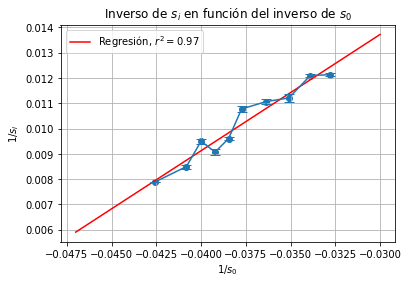

In [36]:
#Con ecuación de Gauss
x = np.linspace(-0.047, -0.03)
plt.scatter(1/s0_array, 1/si_array) #El corte de esta gráfica es 1/f
plt.plot(x, x*slope1 + intercept1, color = "r", 
         label= r"Regresión, $r^2={}$".format(round(r2_1,2)))
plt.errorbar(1/s0_array, 1/si_array, error, capsize=5)
plt.legend()
plt.grid()
plt.xlabel(r"$1/s_0$")
plt.ylabel(r"$1/s_i$")
plt.title(r"Inverso de $s_i$ en función del inverso de $s_0$")

In [23]:
#Distancia focal (¿qué unidades tenemos? ¿cm?)
1/intercept1


36.33521207622498

In [24]:
#h = #altura objeto. Nota: propagar errores y encontrar la distancia focal
hi = np.array([])
#m = hi/h #aumento 

In [25]:
#Con ecuación de Newton
#De la ecuación de Newton s0 = f + f/m
#plt.plot(1+1/m, s0) #La pendiente será la distancia focal

In [41]:
m1= np.array([2, 2.2, 2.5, 2.8, 3, 3.2, 3.6, 3.9, 4.2, 4.5])
m = 0.25*m1
s0 = np.array([-30.5, -29.5, -28.5, -27.5, -26.5, -26, -25.5, -25, -24.5, -23.5])
slope2, intercept2, r2_2  = linregress(1/m, s0)[0:3]

(-18.613735959128448, -6.0308760223912286)

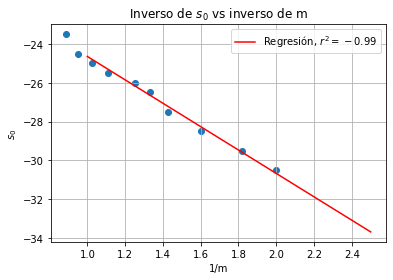

In [42]:
x = np.linspace(1, 2.5, 100)
plt.scatter(1/m ,s0)
plt.grid()
plt.plot(x, intercept2 + x*slope2, color = "r", label= r"Regresión, $r^2={}$".format(round(r2_2,2)))
plt.legend()
plt.ylabel("$s_0$")
plt.xlabel("1/m")
plt.title("Inverso de $s_0$ vs inverso de m")
intercept2 , slope2

In [28]:
def incertidumbres(x,y,m,dx,dy):
  db = dy + dx*(np.mean(y)*np.mean(x) - np.mean(x*y))/(np.mean(x*x)- (np.mean(x)**2))
  dm = (np.mean(y)*np.mean(x) - np.mean(x*y))/(np.mean(x*x)- (np.mean(x)**2)-m)*(dx/np.mean(x))
  return dm, db